## Import dependencies and data

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
summer = pd.read_csv("../Resources/summer.csv")
years = summer['Year'].unique()
countrycodes = pd.read_csv("../resources/ioc_codes.csv")
hostcities = pd.read_csv("../Resources/olympic_hosts.csv")
hosts_summer = hostcities.loc[hostcities["Type"] == "summergames"]
host_names = hosts_summer['Country'].unique()

In [3]:
years

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012], dtype=int64)

In [4]:
host_names

array(['Greece', 'France', 'United States of America', 'Great Britain',
       'Sweden', 'Belgium', 'Netherlands', 'Germany', 'Finland',
       'Australia, Sweden', 'Italy', 'Japan', 'Mexico', 'W Germany',
       'Canada', 'USSR', 'Republic of Korea', 'Spain', 'Australia',
       "People's Republic of China", 'Brazil'], dtype=object)

# Extract data for host years and either side

In [5]:
# Set empty lists
hosts = []
hosts_year = []
hosts_code = []
hosts_years = []
hosts_countries = []
hosts_sample = []
minpos = 0
maxpos = len(years)

# Loop across years
for pos in range (minpos, maxpos):
    # Get year and host
    year = years[pos]
    host = hosts_summer["Country"].loc[hosts_summer["Year"] == year].values[0]
    # 1956 was "Australia/Sweden" - set to just Australia
    if year == 1956:
        host = "Australia"
    # Get host country IOC code
    try:
        code = countrycodes["IOC"].loc[countrycodes["Country"] == host].values[0]
    except IndexError:
        code = ""
    # Set years three either side of host; if not in array then 0
    prev1 = pos-1
    prev2 = pos-2
    prev3 = pos-3
    next1 = pos+1
    next2 = pos+2
    next3 = pos+3
    if prev1 >= minpos:
        prev1year = years[prev1]
    else:
        prev1year = 0
    if prev2 >= minpos:
        prev2year = years[prev2]
    else:
        prev2year = 0
    if prev3 >= minpos:
        prev3year = years[prev3]
    else:
        prev3year = 0
    if next1 < maxpos:
        next1year = years[next1]
    else:
        next1year = 0
    if next2 < maxpos:
        next2year = years[next2]
    else:
        next2year = 0
    if next3 < maxpos:
        next3year = years[next3]
    else:
        next3year = 0
    # Fill lists
    hosts_years.append(year)
    hosts_countries.append(code)
    hosts_sample.append(prev3year)
    hosts_years.append(year)
    hosts_countries.append(code)
    hosts_sample.append(prev2year)
    hosts_years.append(year)
    hosts_countries.append(code)
    hosts_sample.append(prev1year)
    hosts_years.append(year)
    hosts_countries.append(code)
    hosts_sample.append(year)
    hosts_years.append(year)
    hosts_countries.append(code)
    hosts_sample.append(next1year)
    hosts_years.append(year)
    hosts_countries.append(code)
    hosts_sample.append(next2year)
    hosts_years.append(year)
    hosts_countries.append(code)
    hosts_sample.append(next3year)
    
    hosts_year.append(year)
    hosts_code.append(code)

# Create dataframe
hosts = pd.DataFrame({"Host Year": hosts_years, "Country": hosts_countries, "Year": hosts_sample})
host = pd.DataFrame({"Year": hosts_year, "Country": hosts_code})
hosts


,Host Year,Country,Year
0,1896,GRE,0
1,1896,GRE,0
2,1896,GRE,0
3,1896,GRE,1896
4,1896,GRE,1900
...,...,...,...
184,2012,GBR,2008
185,2012,GBR,2012
186,2012,GBR,0
187,2012,GBR,0


In [6]:
# Merge to fill medal numbers, drop empty years
summary_summer = summer.groupby(["Year", "Country"])["Medal"].size().reset_index()

host_medals = pd.merge(hosts, summary_summer, on=["Year", "Country"], how="left")
host_medals = host_medals.dropna()
host_medals

,Host Year,Country,Year,Medal
3,1896,GRE,1896,52.0
5,1896,GRE,1904,2.0
6,1896,GRE,1908,3.0
9,1900,FRA,1896,11.0
10,1900,FRA,1900,185.0
...,...,...,...,...
179,2008,CHN,2012,128.0
182,2012,GBR,2000,55.0
183,2012,GBR,2004,57.0
184,2012,GBR,2008,77.0


In [7]:
host_medals.loc[host_medals["Host Year"] == 1988]

,Host Year,Country,Year,Medal
140,1988,KOR,1976,17.0
142,1988,KOR,1984,42.0
143,1988,KOR,1988,77.0
144,1988,KOR,1992,49.0
145,1988,KOR,1996,66.0
146,1988,KOR,2000,73.0


# Plots

<function matplotlib.pyplot.show(close=None, block=None)>

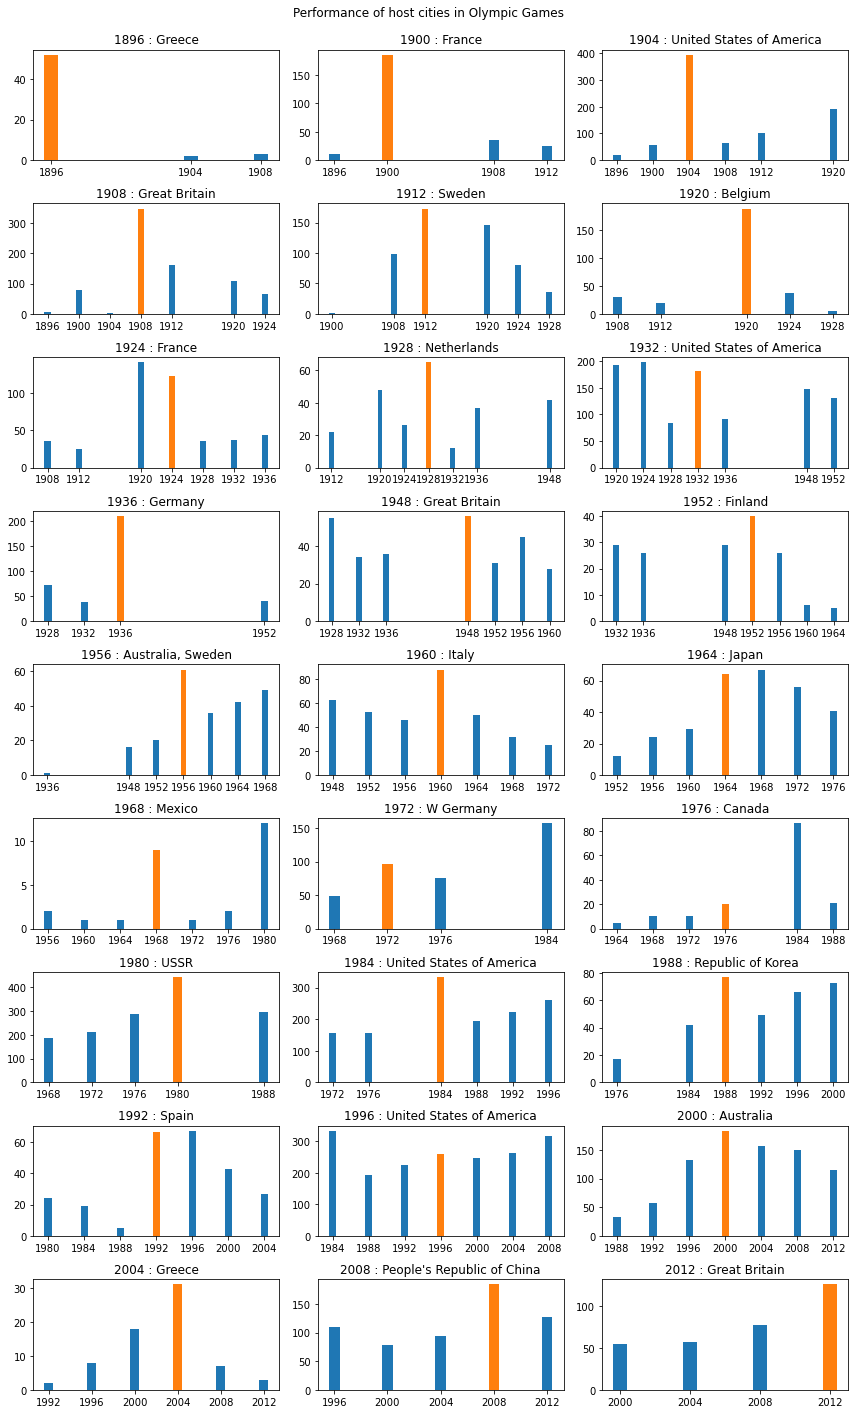

In [61]:
# Subplot for each host year 
fig, ax = plt.subplots(9,3,figsize=(12,20))
fig.suptitle("Performance of host cities in Olympic Games")

for plot in range (len(years)):
    row = int(plot/3)
    col = plot % 3
    year = years[plot]
    plotdf = host_medals.loc[host_medals["Host Year"] == years[plot]]
    name = hosts_summer["Country"].loc[hosts_summer["Year"] == year].to_list()[0]
    plotyears = plotdf["Year"].to_list()
    plotdata = plotdf["Medal"].to_list()
    #set colours
    base_colour = "tab:blue"
    host_colour = "tab:orange"
    bar_colours = []
    for y in plotyears:
        if y == year:
            bar_colours.append(host_colour)
        else:
            bar_colours.append(base_colour)
    ax[row, col].bar(plotyears, plotdata, color=bar_colours)
    plot_title = f"{year} : {name}"
    ax[row, col].set_title(plot_title)
    ax[row, col].set_xticks(plotyears)
    

fig.tight_layout() 
plt.subplots_adjust(top=0.95)
plt.savefig("../images/host_cities.png")
plt.show

This plot shows, for each year of the Games, the total medal count for the host country for the year of hosting and up to three Games either side of the host year.

The orange bar is the host year, blue bars are other years.

Some years appear to have missing data. This is for two reasons:
1. No Games were held during the First and Second world wars (1916, 1940, 1944)
2. In the 1980s, some countries missed some Games for political reasons - this is especially true of the 1980 Games in Moscow, and the USSR did not then attend then 1984 Games in the USA.

<function matplotlib.pyplot.show(close=None, block=None)>

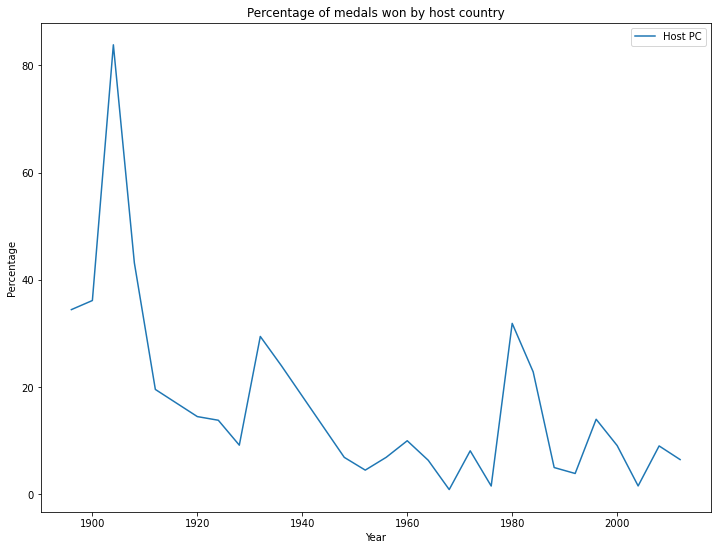

In [9]:
# Total medals awarded
total_medals = summer.groupby(["Year"])["Medal"].size().reset_index()
host_year_medals = pd.merge(host, summary_summer, on=["Year", "Country"], how="left")
host_total_medals = pd.merge(host_year_medals, total_medals, on="Year", how="left")
# Calculate percentage awarded to host
host_total_medals["Host PC"] = 100* host_total_medals["Medal_x"] / host_total_medals["Medal_y"]
host_total_medals.plot(kind="line", x="Year", y="Host PC", figsize=(12,9))
plt.title("Percentage of medals won by host country")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.savefig("../images/percent_medals.png")
plt.show

This plot shows the percentage of medals won by the host country, for each year that the Games have been held

# Statistical analysis

In [10]:
host_medals.loc[(host_medals["Country"]=="GRE")].reset_index().tail(30)

,index,Host Year,Country,Year,Medal
0,3,1896,GRE,1896,52.0
1,5,1896,GRE,1904,2.0
2,6,1896,GRE,1908,3.0
3,168,2004,GRE,1992,2.0
4,169,2004,GRE,1996,8.0
5,170,2004,GRE,2000,18.0
6,171,2004,GRE,2004,31.0
7,172,2004,GRE,2008,7.0
8,173,2004,GRE,2012,3.0


In [11]:
#Null Hypothis is being Host doesn't make a difference
Greece1896_df = pd.DataFrame({
    "observed": [52, 0, 2, 3],
    "expected": [14.25,14.25,14.25,14.25]
}, index=["1896", "1900", "1904", "1908"])
Greece1896_df

,observed,expected
1896,52,14.25
1900,0,14.25
1904,2,14.25
1908,3,14.25


In [12]:
stats.chisquare(Greece1896_df['observed'], Greece1896_df['expected'])

Power_divergenceResult(statistic=133.66666666666666, pvalue=8.766316245006251e-29)

In [13]:
France1900_df = pd.DataFrame({
    "observed": [11,185, 35, 25],
    "expected": [64,64,64,64]
}, index=["1896", "1900", "1908", "1912"])
France1900_df

,observed,expected
1896,11,64
1900,185,64
1908,35,64
1912,25,64


In [14]:
stats.chisquare(France1900_df['observed'], France1900_df['expected'])

Power_divergenceResult(statistic=309.5625, pvalue=8.473593998681377e-67)

In [15]:
USA1904_df = pd.DataFrame({
    "observed": [20,55,394, 63,101,193],
    "expected": [137,138,137,138,138,138]
}, index=["1896", "1900", "1904", "1908","1912","1920"])
USA1904_df

,observed,expected
1896,20,137
1900,55,138
1904,394,137
1908,63,138
1912,101,138
1920,193,138


In [16]:
stats.chisquare(USA1904_df['observed'], USA1904_df['expected'])

Power_divergenceResult(statistic=704.5509362107268, pvalue=5.096164247574544e-150)

In [17]:
GBR1908_df = pd.DataFrame({
    "observed": [7,78,2, 347,160,107,66],
    "expected": [109.57,109.57,109.57,109.57,109.57,109.57,109.57]
}, index=["1896", "1900", "1904", "1908","1912","1920","1924"])
GBR1908_df

,observed,expected
1896,7,109.57
1900,78,109.57
1904,2,109.57
1908,347,109.57
1912,160,109.57
1920,107,109.57
1924,66,109.57


In [18]:
stats.chisquare(GBR1908_df['observed'], GBR1908_df['expected'])

Power_divergenceResult(statistic=765.809202336406, pvalue=3.7502843952284635e-162)

In [19]:
SWE1912_df = pd.DataFrame({
    "observed": [1,98,173,146,80,36],
    "expected": [89,89,89,89,89,89]
}, index=["1900", "1908","1912","1920","1924","1928"])
SWE1912_df

,observed,expected
1900,1,89
1908,98,89
1912,173,89
1920,146,89
1924,80,89
1928,36,89


In [20]:
stats.chisquare(SWE1912_df['observed'], SWE1912_df['expected'])

Power_divergenceResult(statistic=236.17977528089887, pvalue=5.062919347721861e-49)

In [21]:
BEL1920_df = pd.DataFrame({
    "observed": [31,19,188,38,5],
    "expected": [56.2,56.2,56.2,56.2,56.2]
}, index=["1908","1912","1920","1924","1928"])
BEL1920_df

,observed,expected
1908,31,56.2
1912,19,56.2
1920,188,56.2
1924,38,56.2
1928,5,56.2


In [22]:
stats.chisquare(BEL1920_df['observed'], BEL1920_df['expected'])

Power_divergenceResult(statistic=397.55871886120997, pvalue=9.370692771854178e-85)

In [23]:
FRA1924_df = pd.DataFrame({
    "observed":[35,25,141,122,36,37,43],
    "expected": [62.7,62.7,62.7,62.7,62.7,62.7,62.7]
}, index=["1908","1912","1920","1924","1928","1932","1936"])
FRA1924_df

,observed,expected
1908,35,62.7
1912,25,62.7
1920,141,62.7
1924,122,62.7
1928,36,62.7
1932,37,62.7
1936,43,62.7


In [24]:
stats.chisquare(FRA1924_df['observed'], FRA1924_df['expected'])

Power_divergenceResult(statistic=216.86491228070176, pvalue=4.849323988826844e-44)

In [25]:
NED1928_df = pd.DataFrame({
    "observed": [22,48,26,65,12,37,42],
    "expected": [36,36,36,36,36,36,36]
}, index=["1912","1920","1924","1928","1932","1936","1948"])
NED1928_df

,observed,expected
1912,22,36
1920,48,36
1924,26,36
1928,65,36
1932,12,36
1936,37,36
1948,42,36


In [26]:
stats.chisquare(NED1928_df['observed'], NED1928_df['expected'])

Power_divergenceResult(statistic=52.61111111111111, pvalue=1.4050653009397846e-09)

In [27]:
USA1932_df = pd.DataFrame({
    "observed": [193,198,84,181,92,148,132],
    "expected": [146.85,146.85,146.85,146.85,146.85,146.85,146.85]
}, index=["1920","1924","1928","1932","1936","1948","1952"])
USA1932_df

,observed,expected
1920,193,146.85
1924,198,146.85
1928,84,146.85
1932,181,146.85
1936,92,146.85
1948,148,146.85
1952,132,146.85


In [28]:
stats.chisquare(USA1932_df['observed'], USA1932_df['expected'])

Power_divergenceResult(statistic=89.15803541028261, pvalue=4.5319752619692944e-17)

In [29]:
GER1936_df = pd.DataFrame({
    "observed": [72,38,210,40],
    "expected": [90,90,90,90]
}, index=["1928","1932","1936","1952"])
GER1936_df

,observed,expected
1928,72,90
1932,38,90
1936,210,90
1952,40,90


In [30]:
stats.chisquare(GER1936_df['observed'], GER1936_df['expected'])

Power_divergenceResult(statistic=221.42222222222222, pvalue=9.89177642784769e-48)

In [31]:
GBR1948_df = pd.DataFrame({
    "observed": [55,34,36,56,31,45,28],
    "expected": [40.7,40.7,40.7,40.7,40.7,40.7,40.7]
}, index=["1928","1932","1936","1948","1952","1956","1960"])
GBR1948_df

,observed,expected
1928,55,40.7
1932,34,40.7
1936,36,40.7
1948,56,40.7
1952,31,40.7
1956,45,40.7
1960,28,40.7


In [32]:
stats.chisquare(GBR1948_df['observed'], GBR1948_df['expected'])

Power_divergenceResult(statistic=19.15061425061425, pvalue=0.0039166877821731625)

In [33]:
FIN1952_df = pd.DataFrame({
    "observed": [29,26,29,40,26,6,5],
    "expected": [23,23,23,23,23,23,23]
}, index=["1932","1936","1948","1952","1956","1960","1964"])
FIN1952_df

,observed,expected
1932,29,23
1936,26,23
1948,29,23
1952,40,23
1956,26,23
1960,6,23
1964,5,23


In [34]:
stats.chisquare(FIN1952_df['observed'], FIN1952_df['expected'])

Power_divergenceResult(statistic=43.130434782608695, pvalue=1.0991227864511534e-07)

In [35]:
ITA1960_df = pd.DataFrame({
    "observed": [63,53,46,88,50,32,25],
    "expected": [51,51,51,51,51,51,51]
}, index=["1948","1952","1956","1960","1964","1968","1972"])
ITA1960_df

,observed,expected
1948,63,51
1952,53,51
1956,46,51
1960,88,51
1964,50,51
1968,32,51
1972,25,51


In [36]:
stats.chisquare(ITA1960_df['observed'], ITA1960_df['expected'])

Power_divergenceResult(statistic=50.588235294117645, pvalue=3.5827721585838566e-09)

In [37]:
JPN1964_df = pd.DataFrame({
    "observed": [12,24,29,64,67,56,41],
    "expected": [41.86,41.86,41.86,41.86,41.86,41.86,41.86]
}, index=["1952","1956","1960","1964","1968","1972","1976"])
JPN1964_df

,observed,expected
1952,12,41.86
1956,24,41.86
1960,29,41.86
1964,64,41.86
1968,67,41.86
1972,56,41.86
1976,41,41.86


In [38]:
stats.chisquare(JPN1964_df['observed'], JPN1964_df['expected'])

Power_divergenceResult(statistic=64.47341614906833, pvalue=5.525537633677462e-12)

In [39]:
MEX1968_df = pd.DataFrame({
    "observed": [2,1,1,9,1,2,12],
    "expected": [4,4,4,4,4,4,4]
}, index=["1956","1960","1964","1968","1972","1976","1980"])
MEX1968_df

,observed,expected
1956,2,4
1960,1,4
1964,1,4
1968,9,4
1972,1,4
1976,2,4
1980,12,4


In [40]:
stats.chisquare(MEX1968_df['observed'], MEX1968_df['expected'])

Power_divergenceResult(statistic=31.0, pvalue=2.5349284491740774e-05)

In [41]:
CAN1976_df = pd.DataFrame({
    "observed": [5,10,10,20,86,21],
    "expected": [25.33,25.33,25.33,25.33,25.33,25.33]
}, index=["1964","1968","1972","1976","1984","1988"])
CAN1976_df

,observed,expected
1964,5,25.33
1968,10,25.33
1972,10,25.33
1976,20,25.33
1984,86,25.33
1988,21,25.33


In [42]:
stats.chisquare(CAN1976_df['observed'], CAN1976_df['expected'])

Power_divergenceResult(statistic=182.05027240426375, pvalue=1.952217936869038e-37)

In [43]:
RUSIA1980_df = pd.DataFrame({
    "observed": [188,211,285,442,294],
    "expected": [284,284,284,284,284]
}, index=["1968","1972","1976","1980","1988"])
RUSIA1980_df

,observed,expected
1968,188,284
1972,211,284
1976,285,284
1980,442,284
1988,294,284


In [44]:
stats.chisquare(RUSIA1980_df['observed'], RUSIA1980_df['expected'])

Power_divergenceResult(statistic=139.4718309859155, pvalue=3.661986084493103e-29)

In [45]:
USA1984_df= pd.DataFrame({
    "observed": [155,155,333,193,224],
    "expected": [212,212,212,212,212]
}, index=["1972","1976","1984","1988","1992"])
USA1984_df

,observed,expected
1972,155,212
1976,155,212
1984,333,212
1988,193,212
1992,224,212


In [46]:
stats.chisquare(USA1984_df['observed'], USA1984_df['expected'])

Power_divergenceResult(statistic=102.09433962264153, pvalue=3.522840275576157e-21)

In [47]:
PRK1988_df= pd.DataFrame({
    "observed": [2,5,10,0,5,4],
    "expected": [4.33,4.33,4.33,4.33,4.33,4.33]
}, index=["1976","1980","1988","1992","1996","2000"])
PRK1988_df

,observed,expected
1976,2,4.33
1980,5,4.33
1988,10,4.33
1992,0,4.33
1996,5,4.33
2000,4,4.33


In [48]:
stats.chisquare(PRK1988_df['observed'], PRK1988_df['expected'])

Power_divergenceResult(statistic=13.24096997690531, pvalue=0.021222282379152815)

In [49]:
ESP1992_df= pd.DataFrame({
    "observed": [24,19,5,66,67,43,27],
    "expected": [35.86,35.86,35.86,35.86,35.86,35.86,35.86]
}, index=["1980","1984","1988","1992","1996","2000","2004"])
ESP1992_df

,observed,expected
1980,24,35.86
1984,19,35.86
1988,5,35.86
1992,66,35.86
1996,67,35.86
2000,43,35.86
2004,27,35.86


In [50]:
stats.chisquare(ESP1992_df['observed'], ESP1992_df['expected'])

Power_divergenceResult(statistic=94.39088678192972, pvalue=3.702100964495227e-18)

In [51]:
USA1996_df= pd.DataFrame({
    "observed": [193,224,260,248,264,315],
    "expected": [250.66,250.66,250.66,250.66,250.66,250.66]
}, index=["1988","1992","1996","2000","2004","2008"])
USA1996_df

,observed,expected
1988,193,250.66
1992,224,250.66
1996,260,250.66
2000,248,250.66
2004,264,250.66
2008,315,250.66


In [52]:
stats.chisquare(USA1996_df['observed'], USA1996_df['expected'])

Power_divergenceResult(statistic=33.70036543525094, pvalue=2.731420205885907e-06)

In [53]:
AUS2000_df= pd.DataFrame({
    "observed": [34,57,132,183,157,149,114],
    "expected": [118,118,118,118,118,118,118]
}, index=["1988","1992","1996","2000","2004","2008","2012"])
AUS2000_df

,observed,expected
1988,34,118
1992,57,118
1996,132,118
2000,183,118
2004,157,118
2008,149,118
2012,114,118


In [54]:
stats.chisquare(AUS2000_df['observed'], AUS2000_df['expected'])

Power_divergenceResult(statistic=149.96610169491527, pvalue=7.865991195874309e-30)

In [55]:
GRE2004_df= pd.DataFrame({
    "observed": [2,8,18,31,7,3],
    "expected": [11.5,11.5,11.5,11.5,11.5,11.5]
}, index=["1992","1996","2000","2004","2008","2012"])
GRE2004_df

,observed,expected
1992,2,11.5
1996,8,11.5
2000,18,11.5
2004,31,11.5
2008,7,11.5
2012,3,11.5


In [56]:
stats.chisquare(GRE2004_df['observed'], GRE2004_df['expected'])

Power_divergenceResult(statistic=53.69565217391305, pvalue=2.4204471835630843e-10)

In [57]:
CHN2008_df= pd.DataFrame({
    "observed": [110,79,94,184,128],
    "expected": [119,119,119,119,119]
}, index=["1996","2000","2004","2008","2012"])
CHN2008_df

,observed,expected
1996,110,119
2000,79,119
2004,94,119
2008,184,119
2012,128,119


In [58]:
stats.chisquare(CHN2008_df['observed'], CHN2008_df['expected'])

Power_divergenceResult(statistic=55.56302521008403, pvalue=2.4760305061295494e-11)

In [59]:
GBR2012_df= pd.DataFrame({
    "observed": [55,57,77,126],
    "expected": [78.75,78.75,78.75,78.75]
}, index=["2000","2004","2008","2012"])
GBR2012_df

,observed,expected
2000,55,78.75
2004,57,78.75
2008,77,78.75
2012,126,78.75


In [60]:
stats.chisquare(CHN2008_df['observed'], CHN2008_df['expected'])

Power_divergenceResult(statistic=55.56302521008403, pvalue=2.4760305061295494e-11)